Date: 5-Oct-23

- Learning from: Prasert Kanawattanachai (CBS)
- Dataset: bangkok-air-quality.csv
- Youtube: https://www.youtube.com/prasertcbs
- Github: https://github.com/prasertcbs/

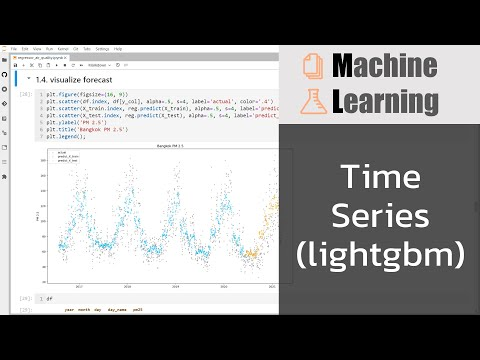

In [83]:
# load Video

from IPython.display import YouTubeVideo

YouTubeVideo('COtinIQk12w', width = 720, height = 405)

In [84]:
# import libraries

import sys
import pandas as pd
import numpy as np
import math
import matplotlib.pylab as plt

from pprint import pprint

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [85]:
import warnings

warnings.filterwarnings('ignore')

In [86]:
# read data to a dataframe

url = 'https://github.com/prasertcbs/basic-dataset/raw/master/bangkok-air-quality.csv'
data = pd.read_csv(url)
data.head()

,date,pm25,pm10,o3,no2,so2,co
0,2021/3/1,93,30,8,6,1,
1,2021/3/2,68,27,7,5,1,
2,2021/3/3,58,37,13,9,1,
3,2021/3/4,74,35,13,6,,
4,2021/3/5,72,38,15,6,1,


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2624 entries, 0 to 2623
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2624 non-null   object
 1    pm25   2624 non-null   object
 2    pm10   2624 non-null   object
 3    o3     2624 non-null   object
 4    no2    2624 non-null   object
 5    so2    2624 non-null   object
 6    co     2624 non-null   object
dtypes: object(7)
memory usage: 143.6+ KB


In [88]:
data = pd.read_csv(url, parse_dates = ['date'], na_values = ' ', skipinitialspace = True)
data.head()

,date,pm25,pm10,o3,no2,so2,co
0,2021-03-01,93.0,30.0,8.0,6.0,1.0,NaN
1,2021-03-02,68.0,27.0,7.0,5.0,1.0,NaN
2,2021-03-03,58.0,37.0,13.0,9.0,1.0,NaN
3,2021-03-04,74.0,35.0,13.0,6.0,NaN,NaN
4,2021-03-05,72.0,38.0,15.0,6.0,1.0,NaN


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2624 entries, 0 to 2623
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2624 non-null   datetime64[ns]
 1   pm25    1680 non-null   float64       
 2   pm10    2609 non-null   float64       
 3   o3      2610 non-null   float64       
 4   no2     2611 non-null   float64       
 5   so2     1877 non-null   float64       
 6   co      963 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 143.6 KB


In [90]:
data = data.sort_values('date').reset_index(drop = True).copy()
data

,date,pm25,pm10,o3,no2,so2,co
0,2013-12-31,NaN,NaN,68.0,33.0,3.0,7.0
1,2014-01-01,NaN,84.0,90.0,48.0,5.0,16.0
2,2014-01-02,NaN,84.0,119.0,63.0,7.0,14.0
3,2014-01-03,NaN,103.0,95.0,57.0,7.0,13.0
4,2014-01-04,NaN,101.0,52.0,34.0,1.0,NaN
...,...,...,...,...,...,...,...
2619,2021-03-10,98.0,53.0,16.0,12.0,1.0,NaN
2620,2021-03-11,111.0,52.0,19.0,10.0,NaN,NaN
2621,2021-03-12,101.0,48.0,15.0,7.0,1.0,NaN
2622,2021-03-13,96.0,32.0,9.0,4.0,1.0,NaN


In [91]:
y_col = 'pm25'
y_col

'pm25'

In [92]:
# drop NA referred to column pm25

data.dropna(subset = [y_col], inplace = True)

In [93]:
data

,date,pm25,pm10,o3,no2,so2,co
938,2016-07-30,61.0,19.0,17.0,15.0,8.0,6.0
939,2016-07-31,68.0,24.0,25.0,13.0,7.0,6.0
940,2016-08-01,60.0,20.0,26.0,14.0,2.0,6.0
941,2016-08-02,68.0,25.0,21.0,14.0,7.0,6.0
942,2016-08-03,70.0,26.0,23.0,16.0,2.0,6.0
...,...,...,...,...,...,...,...
2619,2021-03-10,98.0,53.0,16.0,12.0,1.0,NaN
2620,2021-03-11,111.0,52.0,19.0,10.0,NaN,NaN
2621,2021-03-12,101.0,48.0,15.0,7.0,1.0,NaN
2622,2021-03-13,96.0,32.0,9.0,4.0,1.0,NaN


In [94]:
# reset index

data = data.reset_index(drop = True)
data

,date,pm25,pm10,o3,no2,so2,co
0,2016-07-30,61.0,19.0,17.0,15.0,8.0,6.0
1,2016-07-31,68.0,24.0,25.0,13.0,7.0,6.0
2,2016-08-01,60.0,20.0,26.0,14.0,2.0,6.0
3,2016-08-02,68.0,25.0,21.0,14.0,7.0,6.0
4,2016-08-03,70.0,26.0,23.0,16.0,2.0,6.0
...,...,...,...,...,...,...,...
1675,2021-03-10,98.0,53.0,16.0,12.0,1.0,NaN
1676,2021-03-11,111.0,52.0,19.0,10.0,NaN,NaN
1677,2021-03-12,101.0,48.0,15.0,7.0,1.0,NaN
1678,2021-03-13,96.0,32.0,9.0,4.0,1.0,NaN


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1680 non-null   datetime64[ns]
 1   pm25    1680 non-null   float64       
 2   pm10    1672 non-null   float64       
 3   o3      1672 non-null   float64       
 4   no2     1672 non-null   float64       
 5   so2     943 non-null    float64       
 6   co      31 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 92.0 KB


In [96]:
# create a function to separate year, month, day, day name (Sunday-Saturday)

def date_parts(data, date_col = 'date'):
    
    ''' 
    create new columns for year, month, day, and day name
    '''

    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['day_name'] = data['date'].dt.day_name().astype('category')

In [97]:
# call a function above to get new data from 'date' column

date_parts(data)

In [98]:
data

,date,pm25,pm10,o3,no2,so2,co,year,month,day,day_name
0,2016-07-30,61.0,19.0,17.0,15.0,8.0,6.0,2016,7,30,Saturday
1,2016-07-31,68.0,24.0,25.0,13.0,7.0,6.0,2016,7,31,Sunday
2,2016-08-01,60.0,20.0,26.0,14.0,2.0,6.0,2016,8,1,Monday
3,2016-08-02,68.0,25.0,21.0,14.0,7.0,6.0,2016,8,2,Tuesday
4,2016-08-03,70.0,26.0,23.0,16.0,2.0,6.0,2016,8,3,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
1675,2021-03-10,98.0,53.0,16.0,12.0,1.0,NaN,2021,3,10,Wednesday
1676,2021-03-11,111.0,52.0,19.0,10.0,NaN,NaN,2021,3,11,Thursday
1677,2021-03-12,101.0,48.0,15.0,7.0,1.0,NaN,2021,3,12,Friday
1678,2021-03-13,96.0,32.0,9.0,4.0,1.0,NaN,2021,3,13,Saturday


In [99]:
data.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'year', 'month',
       'day', 'day_name'],
      dtype='object')

In [100]:
# select columns and save to new dataframe

df = data[['date', 'year', 'month', 'day', 'day_name', y_col]]
df

,date,year,month,day,day_name,pm25
0,2016-07-30,2016,7,30,Saturday,61.0
1,2016-07-31,2016,7,31,Sunday,68.0
2,2016-08-01,2016,8,1,Monday,60.0
3,2016-08-02,2016,8,2,Tuesday,68.0
4,2016-08-03,2016,8,3,Wednesday,70.0
...,...,...,...,...,...,...
1675,2021-03-10,2021,3,10,Wednesday,98.0
1676,2021-03-11,2021,3,11,Thursday,111.0
1677,2021-03-12,2021,3,12,Friday,101.0
1678,2021-03-13,2021,3,13,Saturday,96.0


In [101]:
# set date to be an index

df = df.set_index('date')
df

,year,month,day,day_name,pm25
date,,,,,
2016-07-30,2016,7,30,Saturday,61.0
2016-07-31,2016,7,31,Sunday,68.0
2016-08-01,2016,8,1,Monday,60.0
2016-08-02,2016,8,2,Tuesday,68.0
2016-08-03,2016,8,3,Wednesday,70.0
...,...,...,...,...,...
2021-03-10,2021,3,10,Wednesday,98.0
2021-03-11,2021,3,11,Thursday,111.0
2021-03-12,2021,3,12,Friday,101.0


### Visualize data

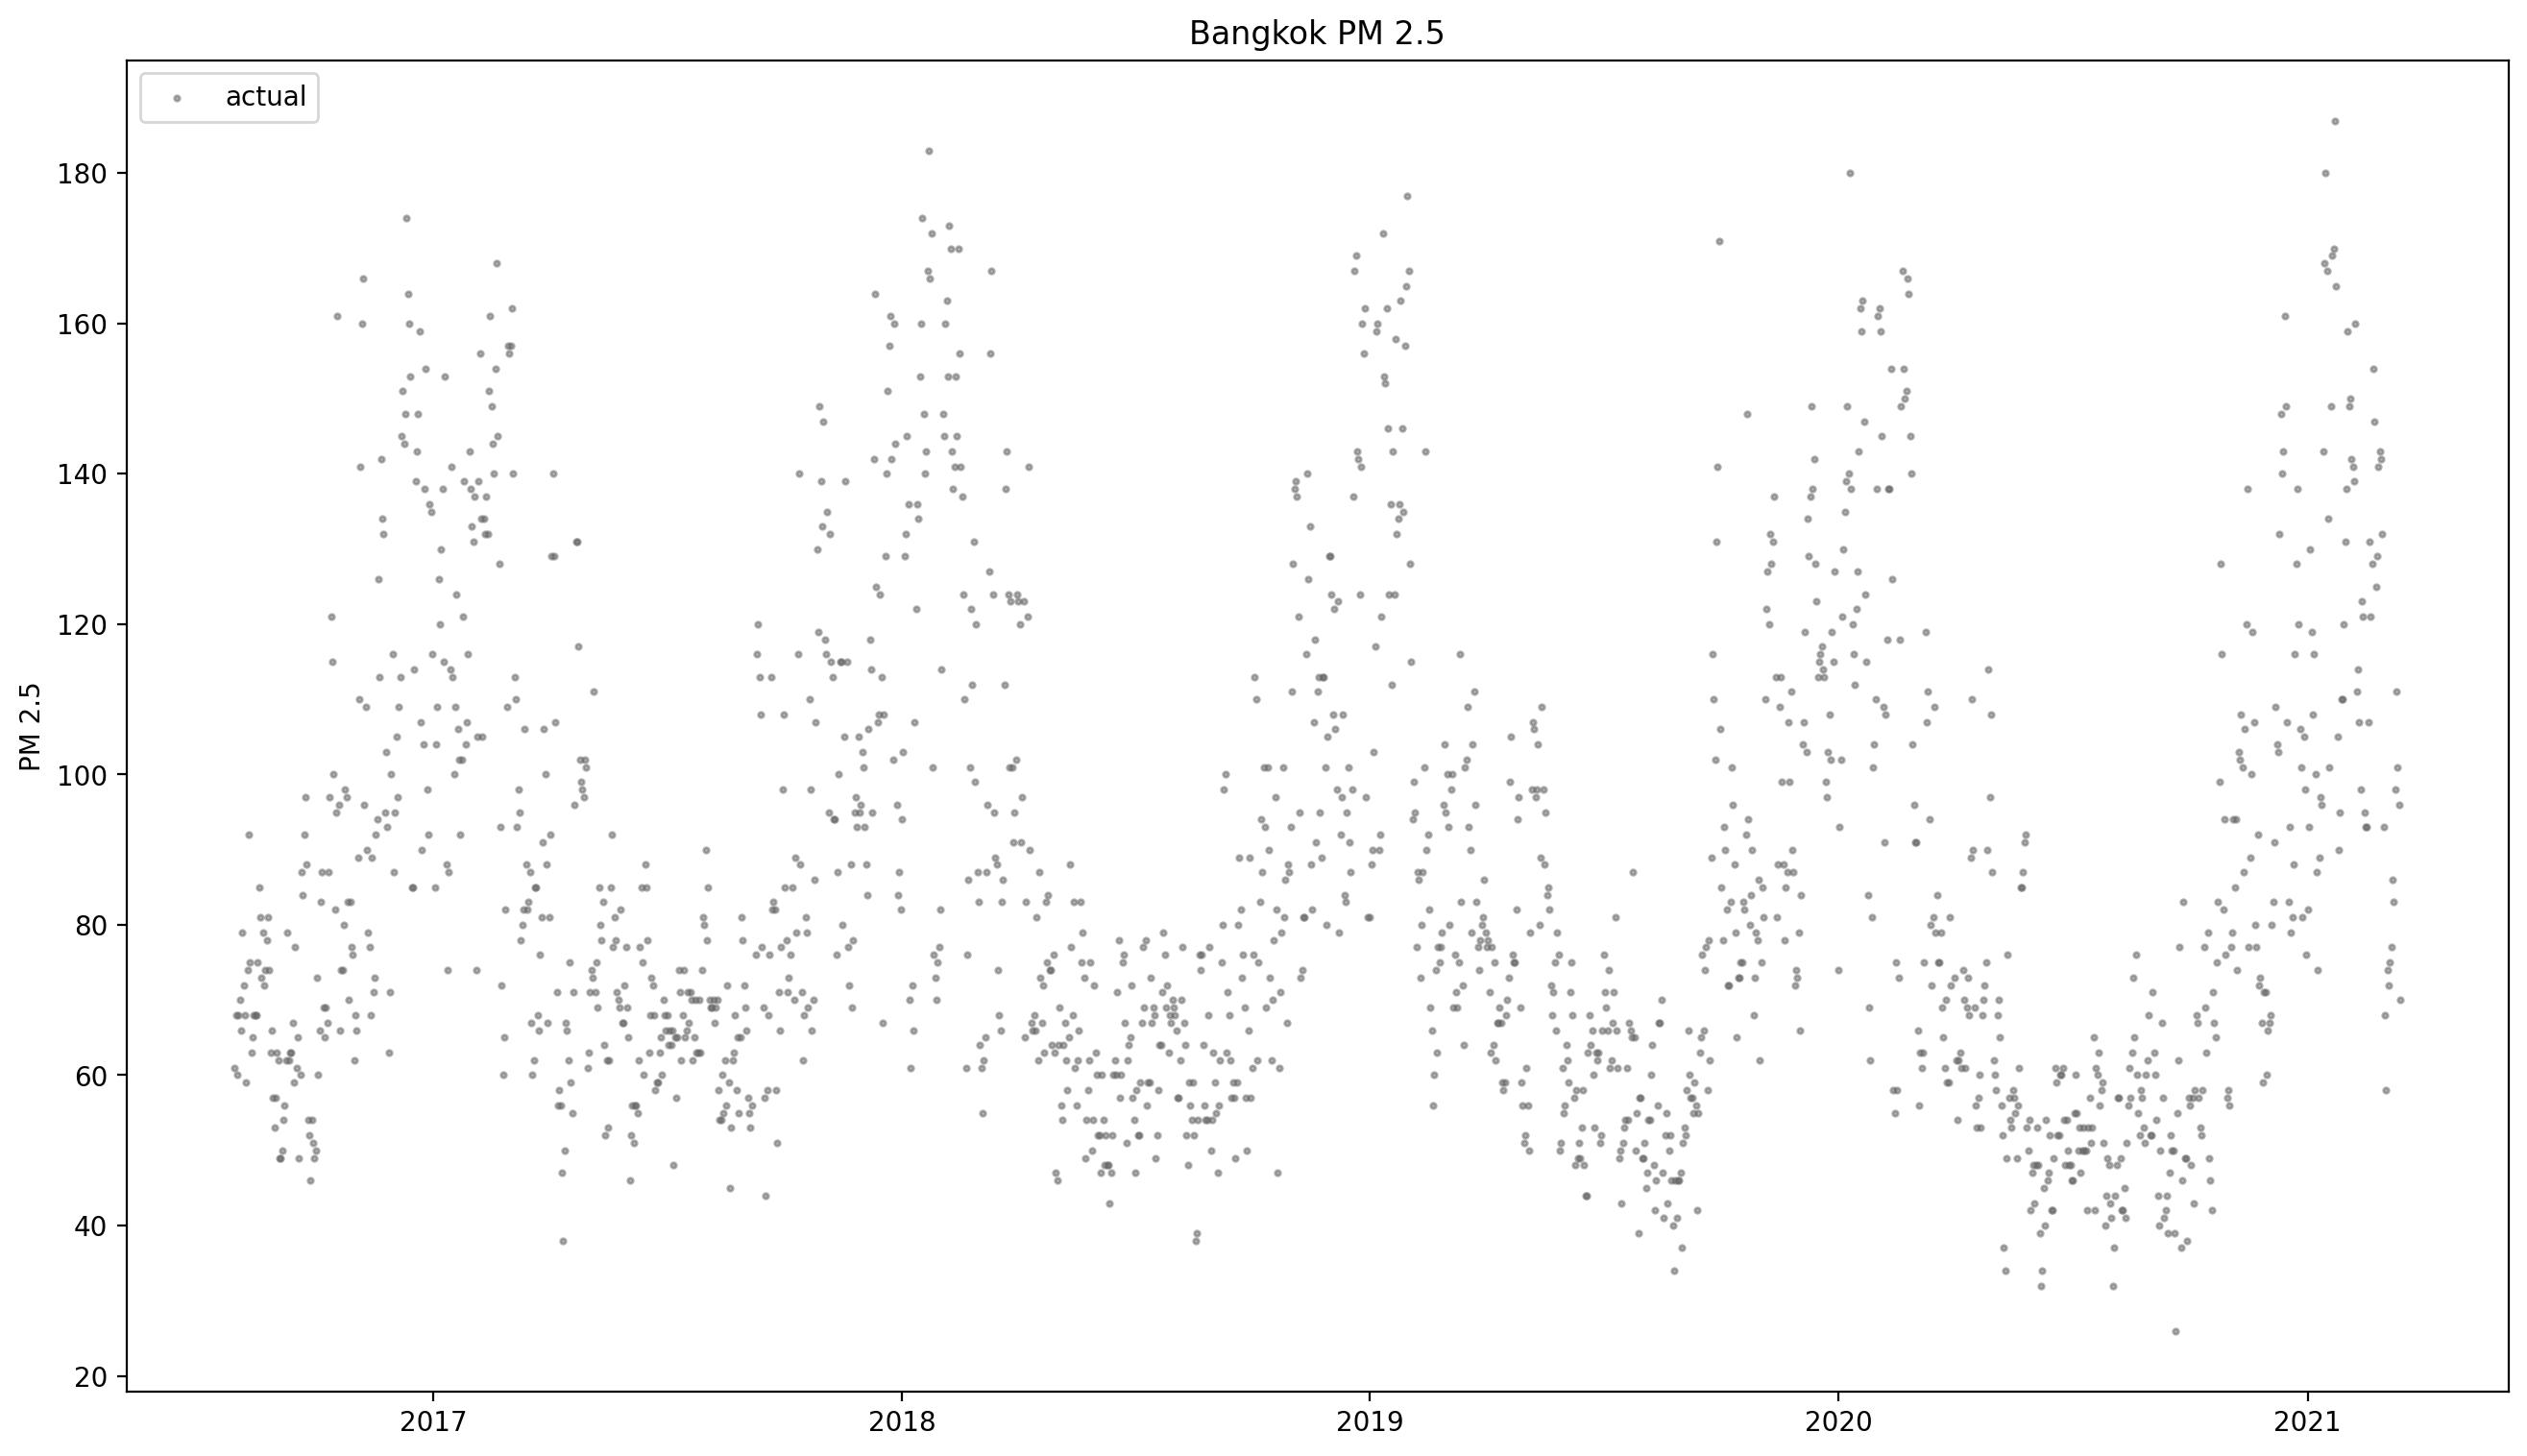

In [102]:
plt.figure(figsize = (16, 9))
plt.scatter(df.index, df[y_col], alpha = .5, s = 4, label = 'actual', color = '.4')
plt.ylabel('PM 2.5')
plt.title('Bangkok PM 2.5')
plt.legend();

### lightgbm regressor

In [103]:
df.columns

Index(['year', 'month', 'day', 'day_name', 'pm25'], dtype='object')

In [104]:
feature_cols = ['year', 'month', 'day', 'day_name']
feature_cols

['year', 'month', 'day', 'day_name']

In [105]:
X = df[feature_cols]
X.tail()

,year,month,day,day_name
date,,,,
2021-03-10,2021,3,10,Wednesday
2021-03-11,2021,3,11,Thursday
2021-03-12,2021,3,12,Friday
2021-03-13,2021,3,13,Saturday
2021-03-14,2021,3,14,Sunday


In [106]:
y = df[y_col]
y.tail()

date
2021-03-10     98.0
2021-03-11    111.0
2021-03-12    101.0
2021-03-13     96.0
2021-03-14     70.0
Name: pm25, dtype: float64

In [107]:
X.shape

(1680, 4)

In [108]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb

print(f'lightgbm version: {lgb.__version__}')

lightgbm version: 4.0.0


In [109]:
# split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1512, 4), (168, 4), (1512,), (168,))

In [110]:
split_at = 1400

X_train, X_test, y_train, y_test = X[:split_at], X[split_at:], y[:split_at], y[split_at:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1400, 4), (280, 4), (1400,), (280,))

In [111]:
# create a model

reg = lgb.LGBMRegressor()
reg

LGBMRegressor()

In [112]:
reg.get_params() # default params

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [113]:
# set params

params = {'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1, # set to be -1
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [114]:
reg = lgb.LGBMRegressor(**params)
reg

LGBMRegressor(n_jobs=-1)